## Programming Exercise 1 - Linear Regression

- [warmUpExercise](#warmUpExercise)
- [Linear regression with one variable](#Linear-regression-with-one-variable)
- [Gradient Descent](#Gradient-Descent)

In [13]:
# %load ../../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline  

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

#### warmUpExercise

In [14]:
def warmUpExercise():
    return(np.identity(5))

In [3]:
warmUpExercise()

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

### Linear regression with one variable

In [15]:
data = np.loadtxt('data/ex1data1.txt', delimiter=',')

X = np.c_[np.ones(data.shape[0]),data[:,0]]
y = np.c_[data[:,1]]
print(X)
print(y)


[[ 1.      6.1101]
 [ 1.      5.5277]
 [ 1.      8.5186]
 [ 1.      7.0032]
 [ 1.      5.8598]
 [ 1.      8.3829]
 [ 1.      7.4764]
 [ 1.      8.5781]
 [ 1.      6.4862]
 [ 1.      5.0546]
 [ 1.      5.7107]
 [ 1.     14.164 ]
 [ 1.      5.734 ]
 [ 1.      8.4084]
 [ 1.      5.6407]
 [ 1.      5.3794]
 [ 1.      6.3654]
 [ 1.      5.1301]
 [ 1.      6.4296]
 [ 1.      7.0708]
 [ 1.      6.1891]
 [ 1.     20.27  ]
 [ 1.      5.4901]
 [ 1.      6.3261]
 [ 1.      5.5649]
 [ 1.     18.945 ]
 [ 1.     12.828 ]
 [ 1.     10.957 ]
 [ 1.     13.176 ]
 [ 1.     22.203 ]
 [ 1.      5.2524]
 [ 1.      6.5894]
 [ 1.      9.2482]
 [ 1.      5.8918]
 [ 1.      8.2111]
 [ 1.      7.9334]
 [ 1.      8.0959]
 [ 1.      5.6063]
 [ 1.     12.836 ]
 [ 1.      6.3534]
 [ 1.      5.4069]
 [ 1.      6.8825]
 [ 1.     11.708 ]
 [ 1.      5.7737]
 [ 1.      7.8247]
 [ 1.      7.0931]
 [ 1.      5.0702]
 [ 1.      5.8014]
 [ 1.     11.7   ]
 [ 1.      5.5416]
 [ 1.      7.5402]
 [ 1.      5.3077]
 [ 1.      7

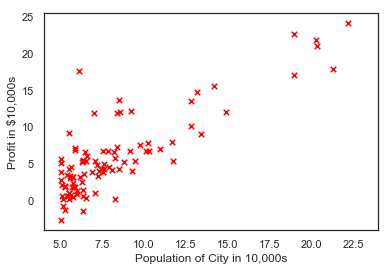

In [16]:
plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s');

#### Gradient Descent

In [17]:
def computeCost(X, y, theta=[[0],[0]]):
    m = y.size # n
    J = 0 #rss
    
    h = X.dot(theta) #f or y_hat
    print(h)
    
    J = 1/(2*m)*np.sum(np.square(h-y)) #rss
    
    return(J)

In [10]:
computeCost(X,y)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


32.072733877455676

In [18]:
def gradientDescent(X, y, theta=[[0],[0]], alpha=0.01, num_iters=1500):
    m = y.size #n
    J_history = np.zeros(num_iters) #rss_history
    
    for iter in np.arange(num_iters):
        h = X.dot(theta) # f
        theta = theta - alpha*(1/m)*(X.T.dot(h-y)) # w
        J_history[iter] = computeCost(X, y, theta) # rss_history
    return(theta, J_history) #(w, rss_history)

theta:  [-3.63029144  1.16636235]


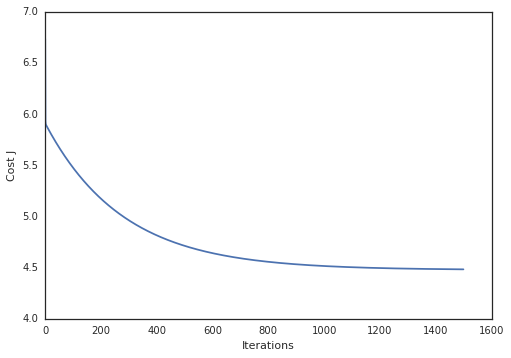

In [14]:
# theta for minimized cost J
theta , Cost_J = gradientDescent(X, y) # f, rss
print('theta: ',theta.ravel()) # f

plt.plot(Cost_J) # f
plt.ylabel('Cost J')  # f
plt.xlabel('Iterations'); 

In [19]:
xx = np.arange(5,23)
yy = theta[0]+theta[1]*xx # w[0]+w[1]*xx

# Plot gradient descent
plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.plot(xx,yy, label='Linear regression (Gradient descent)')

# Compare with Scikit-learn Linear regression 
regr = LinearRegression()
regr.fit(X[:,1].reshape(-1,1), y.ravel())
plt.plot(xx, regr.intercept_+regr.coef_*xx, label='Linear regression (Scikit-learn GLM)')

plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc=4);

NameError: name 'theta' is not defined

In [3]:
# Create grid coordinates for plotting
B0 = np.linspace(-10, 10, 50)
B1 = np.linspace(-1, 4, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (Cost) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] = computeCost(X,y, theta=[[xx[i,j]], [yy[i,j]]])

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax1.scatter(theta[0],theta[1], c='r')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax2.set_zlabel('Cost')
ax2.set_zlim(Z.min(),Z.max())
ax2.view_init(elev=15, azim=230)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)

NameError: name 'computeCost' is not defined

In [26]:
def predictFunc (x,theta) :
    return x.dot(theta) #predict(yhat)
data = np.loadtxt('data/taskDate.txt', delimiter=',')

x= np.c_[np.ones(data.shape[0]),data[:,0]]
predictFunc (x,theta=[[0],[1]])

array([[34.62365962],
       [30.28671077],
       [35.84740877],
       [60.18259939],
       [79.03273605],
       [45.08327748],
       [61.10666454],
       [75.02474557],
       [76.0987867 ],
       [84.43281996]])

NameError: name 'theate' is not defined